In [1]:
import act
import glob
import matplotlib.pyplot as plt
import matplotlib

In [2]:
files2 = glob.glob('houceil*')

In [3]:
ds = act.io.read_arm_netcdf(files2)

In [67]:
ds

<xarray.Dataset> Size: 356MB
Dimensions:                 (time: 37799, bound: 2, range: 770)
Coordinates:
  * time                    (time) datetime64[ns] 302kB 2022-08-08T00:00:06 ....
  * range                   (range) float32 3kB 5.0 15.0 ... 7.685e+03 7.695e+03
Dimensions without coordinates: bound
Data variables: (12/34)
    base_time               (time) datetime64[ns] 302kB 2022-08-08 ... 2022-0...
    time_offset             (time) datetime64[ns] 302kB 2022-08-08T00:00:06 ....
    time_bounds             (time, bound) object 605kB dask.array<chunksize=(5398, 2), meta=np.ndarray>
    range_bounds            (time, range, bound) float32 233MB dask.array<chunksize=(5398, 770, 2), meta=np.ndarray>
    detection_status        (time) float32 151kB dask.array<chunksize=(5398,), meta=np.ndarray>
    status_flag             (time) float32 151kB dask.array<chunksize=(5398,), meta=np.ndarray>
    ...                      ...
    backscatter             (time, range) float32 116MB dask.array<chunksize=(5398, 770), meta=np.ndarray>
    measurement_parameters  (time) |S12 454kB dask.array<chunksize=(5398,), meta=np.ndarray>
    status_string           (time) |S12 454kB dask.array<chunksize=(5398,), meta=np.ndarray>
    lat                     (time) float32 151kB 29.67 29.67 ... 29.67 29.67
    lon                     (time) float32 151kB -95.06 -95.06 ... -95.06 -95.06
    alt                     (time) float32 151kB 8.0 8.0 8.0 8.0 ... 8.0 8.0 8.0
Attributes: (12/23)
    command_line:                ceil_ingest -s hou -f M1
    Conventions:                 ARM-1.3
    process_version:             ingest-ceil-1.9-0.el7
    dod_version:                 ceil10m-b1-2.0
    input_source:                /data/collection/hou/houceilM1.00/L1__202208...
    site_id:                     hou
    ...                          ...
    doi:                         10.5439/1497398
    history:                     created by user dsmgr on machine flint at 20...
    _file_dates:                 ['20220808', '20220809', '20220810', '202208...
    _file_times:                 ['000006', '000004', '000001', '000015', '00...
    _datastream:                 houceil10mM1.b1
    _arm_standards_flag:         1

In [4]:
ds.attrs['datastream'] = 'celiometer.b1'

In [5]:
variables = ['backscatter', 'first_cbh']

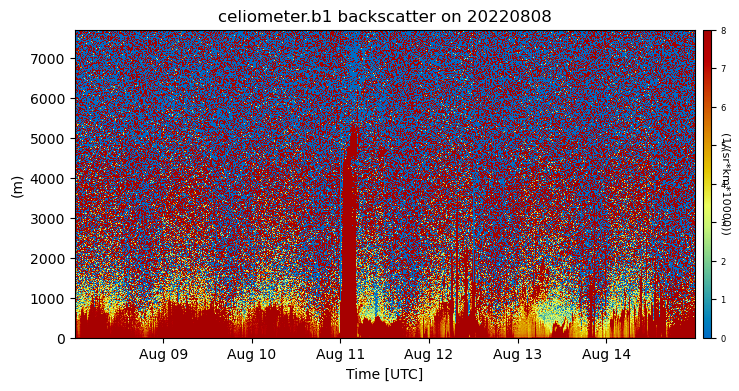

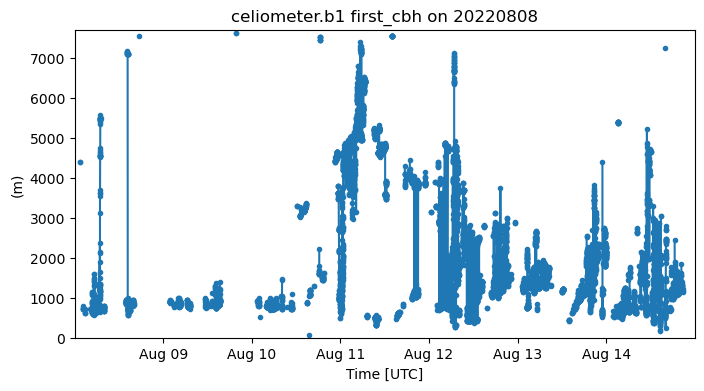

In [70]:
for variable in variables:
    display = act.plotting.TimeSeriesDisplay(ds, figsize=(8,4))
    if variable == 'backscatter':
        display.plot(variable,
                     cmap='HomeyerRainbow',
                     vmin=0,
                     vmax=8,
                     y_rng=(0, ds.range.max().values))
    else:
        display.plot(variable,
                     cmap='HomeyerRainbow',
                     y_rng=(0, ds.range.max().values))
    plt.show()
    plt.close()

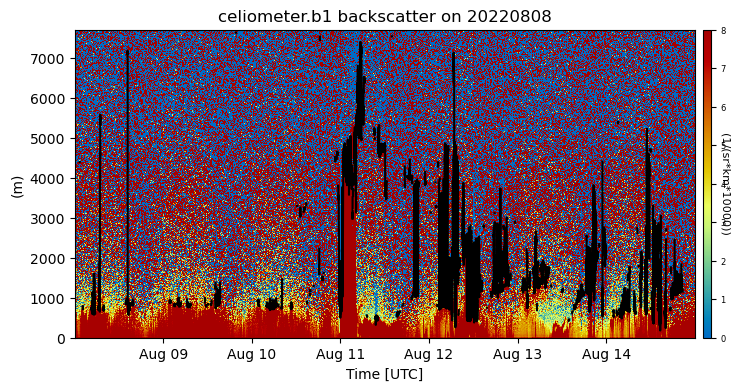

In [6]:
display = act.plotting.TimeSeriesDisplay(ds, figsize=(8,4))
display.plot("backscatter",
             cmap='HomeyerRainbow',
             vmin=0,
             vmax=8,
             y_rng=(0, ds.range.max().values))
display.axes[0].plot(ds.time.values, ds.first_cbh.values, 'black')
#display.plot("first_cbh",
 #            cmap='Gray5',
  #           y_rng=(0, ds.range.max().values))
"""
def hlines(
        y: float,
        xmin: float,
        xmax: float,
        colors: 'black',
        linestyles = "solid",
        label: str = "CBH",
        *,
        data=None,
    ):
  """        
plt.show()
plt.close()